In [147]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [15]:
cd /g/data/ik11/inputs/access-om3/0.x.0/1deg/

/g/data/ik11/inputs/access-om3/0.x.0/1deg


In [17]:
mom_ds = xr.open_dataset('mom/ocean_hgrid.nc')

In [64]:
cice_ds = xr.open_dataset('cice/grid.nc')

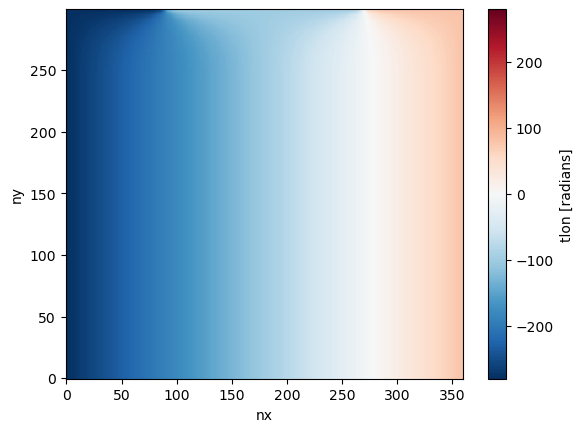

In [130]:
np.rad2deg(cice_ds.tlon).plot()

In [18]:
mom_ds

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

In [109]:
tarea = mom_ds.area.coarsen(nx=2, ny=2).sum()

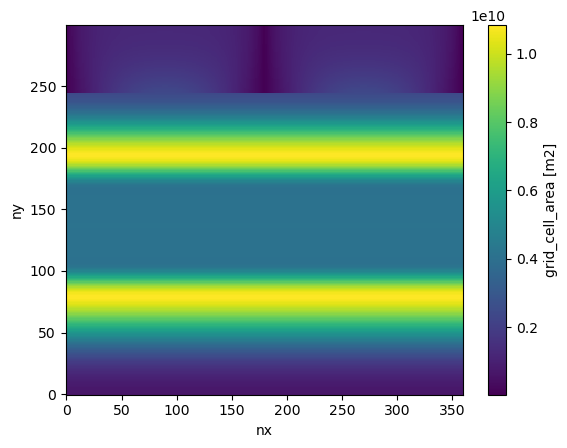

In [110]:
tarea.plot()

In [111]:
cice_ds.tarea.dtype

dtype('float64')

In [112]:
tarea.dtype

dtype('float64')

In [113]:
tarea.units

'm2'

In [114]:
cice_ds.tarea.units

'm^2'

In [115]:
tarea-cice_ds.tarea

<xarray.DataArray (ny: 300, nx: 360)>
array([[ 7.04526901e-05,  7.04526901e-05,  7.04526901e-05, ...,
         0.00000000e+00,  7.04526901e-05,  7.04526901e-05],
       [-1.19209290e-07, -1.19209290e-07, -1.19209290e-07, ...,
        -1.19209290e-07, -1.19209290e-07, -1.19209290e-07],
       [ 1.19209290e-07,  1.19209290e-07,  1.19209290e-07, ...,
         1.19209290e-07,  1.19209290e-07,  1.19209290e-07],
       ...,
       [-2.47219464e+04, -2.40641643e+04, -2.34447661e+04, ...,
        -2.34447661e+04, -2.40641643e+04, -2.47219464e+04],
       [-2.51920304e+04, -2.45179796e+04, -2.38847086e+04, ...,
        -2.38847086e+04, -2.45179795e+04, -2.51920304e+04],
       [-2.54289325e+04, -2.47466618e+04, -2.41063864e+04, ...,
        -2.41063864e+04, -2.47466618e+04, -2.54289325e+04]])
Dimensions without coordinates: ny, nx

If we ignore the tripole for a second:

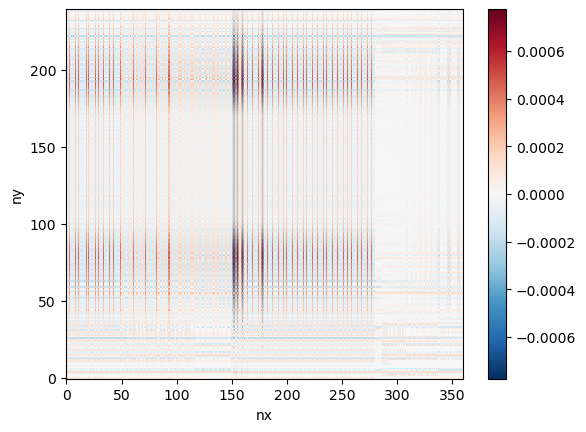

In [132]:
(tarea-cice_ds.tarea).isel(ny=slice(0,240)).plot()

Lets calculate tarea a different way

In [117]:
tarea2 = mom_ds.area[::2,::2]+mom_ds.area[1::2,::2]+mom_ds.area[1::2,1::2]+mom_ds.area[::2,1::2]

In [153]:
tarea[-1,-1]

<xarray.DataArray 'area' ()>
array(38390617.9489371)
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [154]:
tarea2[-1,-1]

<xarray.DataArray 'area' ()>
array(38390617.94893711)

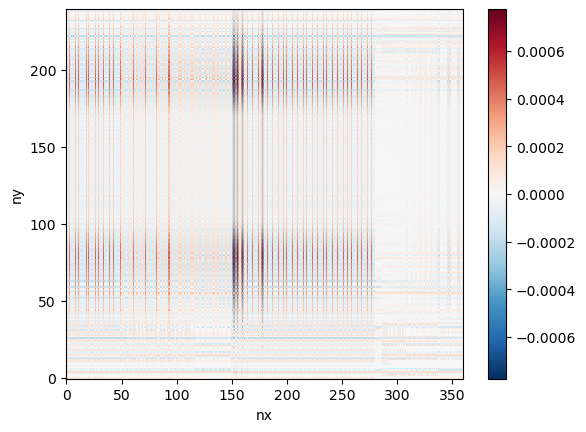

In [133]:
(tarea-cice_ds.tarea).isel(ny=slice(0,240)).plot()

As a fraction

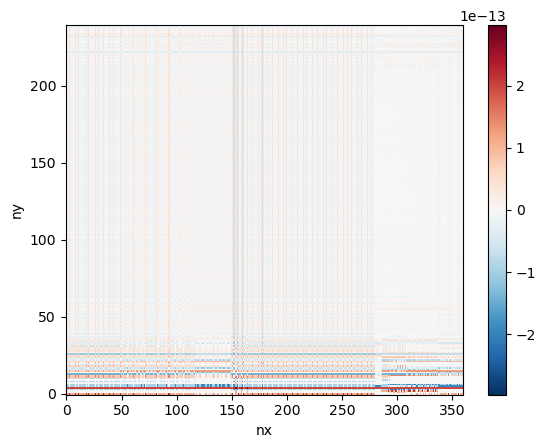

In [158]:
((tarea-cice_ds.tarea)/tarea).isel(ny=slice(0,240)).plot()

(array([12232., 17656.,  7192., 29520.,  6480.,  5760.,  5400.,  5760.,
         6120., 11880.]),
 array([2.10747593e+07, 1.10312409e+09, 2.18517341e+09, 3.26722274e+09,
        4.34927207e+09, 5.43132140e+09, 6.51337072e+09, 7.59542005e+09,
        8.67746938e+09, 9.75951871e+09, 1.08415680e+10]),
 <BarContainer object of 10 artists>)

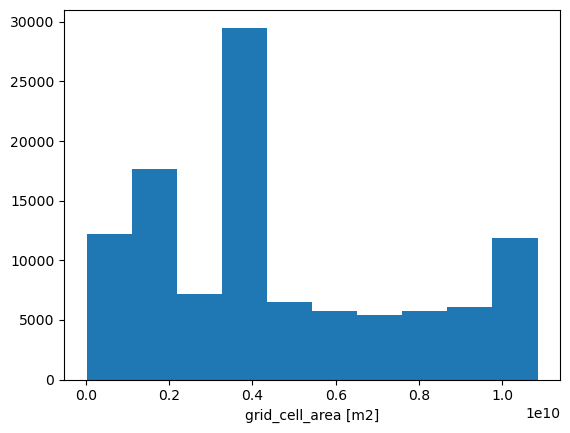

In [150]:
tarea.plot.hist()

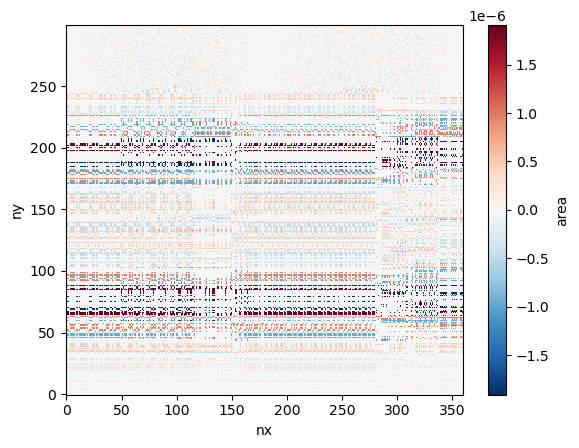

In [134]:
(tarea2-tarea).plot()

I think that is small enough to be rounding / order of operations errors (i.e. its about the 14th sig fig)

# The tripole

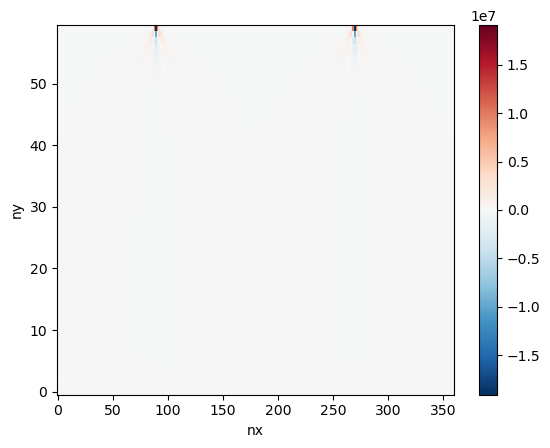

In [218]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300)).plot()

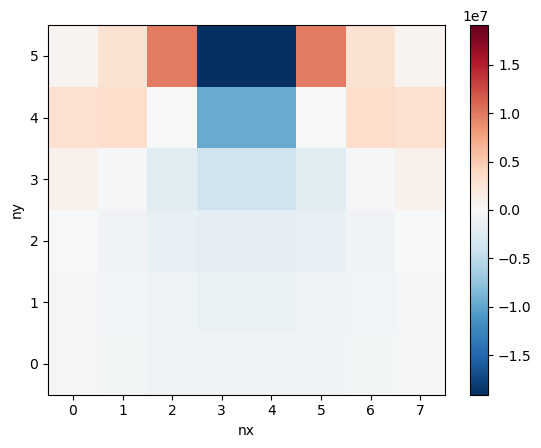

In [236]:
(tarea-cice_ds.tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

In [255]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300), nx=slice(0,180)).sum()

<xarray.DataArray ()>
array(0.00487775)

In [254]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300), nx=slice(180,360)).sum()

<xarray.DataArray ()>
array(0.0069931)

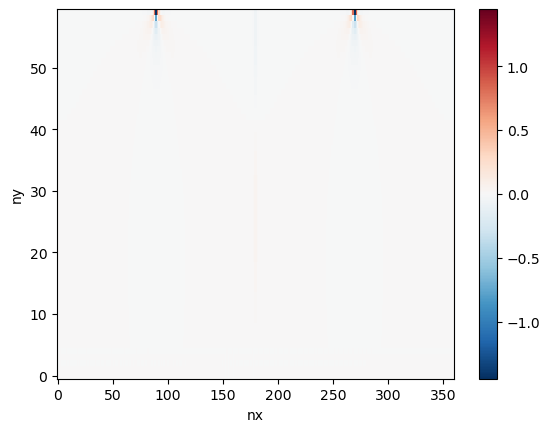

In [266]:
((tarea-cice_ds.tarea)/tarea*100).isel(ny=slice(240,300)).plot()

In [249]:
(tarea-cice_ds.tarea).isel(ny=slice(0,250)).sum()

<xarray.DataArray ()>
array(1193778.46967296)

In [250]:
(tarea-cice_ds.tarea).sum()

<xarray.DataArray ()>
array(-0.02489651)

In [238]:
(tarea-cice_ds.tarea).isel(ny=299, nx=slice(86,94)).values

array([   462409.62934494,   2684143.52138448,   9877771.1061306 ,
       -19085417.98000479, -19085417.9754982 ,   9877771.10838389,
         2684143.52363777,    462409.63272476])

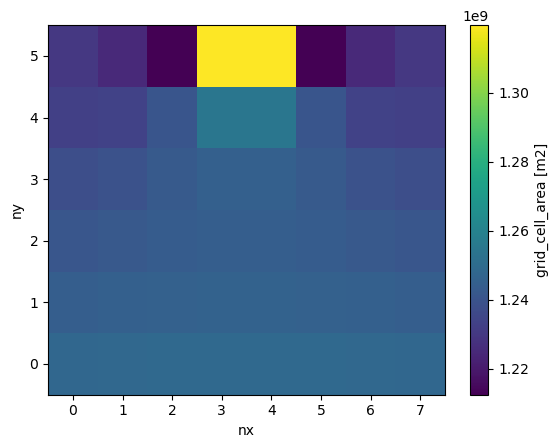

In [239]:
(tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

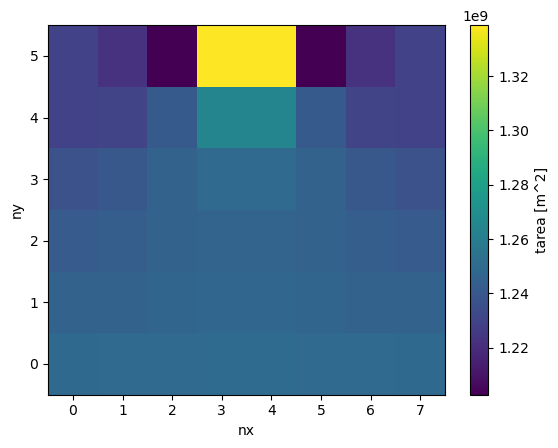

In [240]:
(cice_ds.tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

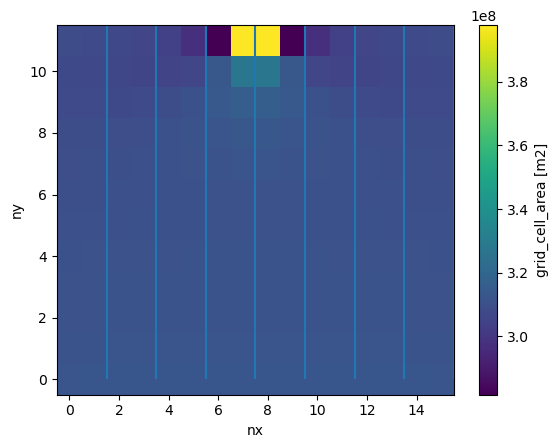

In [241]:
(mom_ds.area).isel(ny=slice(294*2,300*2), nx=slice(86*2,94*2)).plot()
plt.vlines([1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5], 0,12)

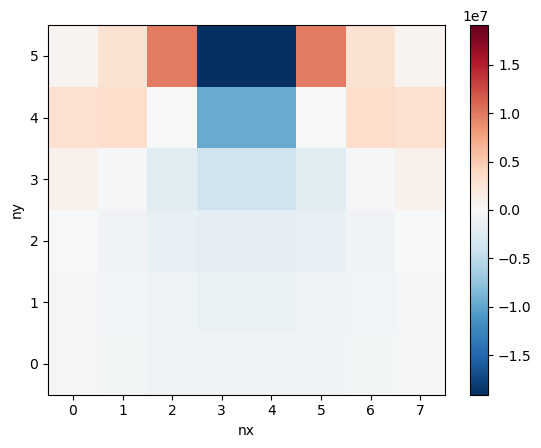

In [245]:
(tarea-cice_ds.tarea).isel(ny=slice(294,300), nx=slice(266,274)).plot()

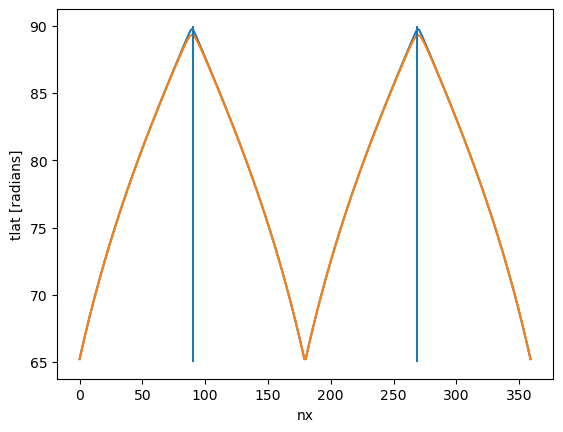

In [196]:
np.rad2deg(cice_ds.tlat.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlat.isel(ny=298)).plot()
plt.vlines([90, 150+119], 65,90)

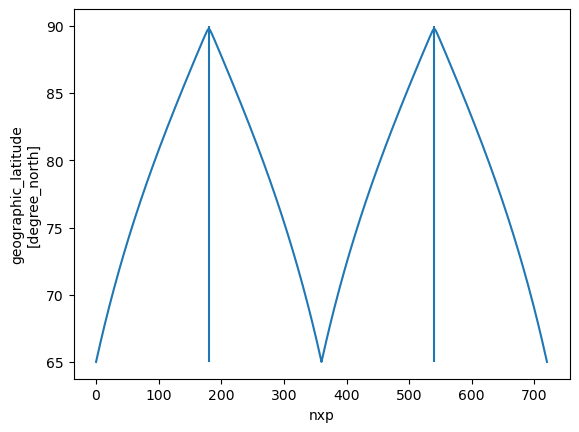

In [202]:
mom_ds.y.isel(nyp=599).plot()
plt.vlines([180, 540], 65,90)

In [198]:
mom_ds.y.isel(nyp=599).argmax()

<xarray.DataArray 'y' ()>
array(180)

In [206]:
mom_ds.y.isel(nyp=599).max()

<xarray.DataArray 'y' ()>
array(89.77447613)

In [209]:
mom_ds.y.isel(nyp=599, nxp=181).max()

<xarray.DataArray 'y' ()>
array(89.74870688)

In [215]:
mom_ds.y.isel(nyp=600, nxp=[179,180,181]).values

array([89.889152, 90.      , 89.889152])

In [216]:
mom_ds.y.isel(nyp=600, nxp=slice(300,720)).argmax()

<xarray.DataArray 'y' ()>
array(240)

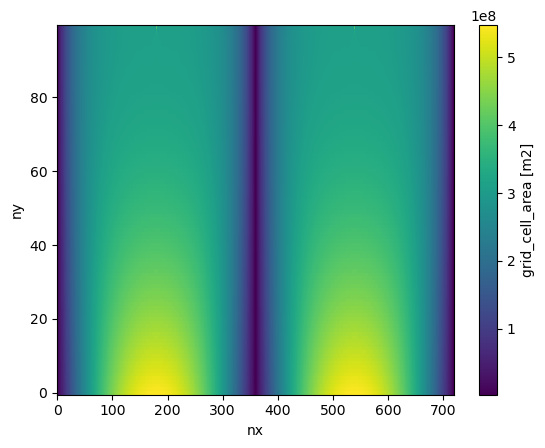

In [168]:
mom_ds.area.isel(ny=slice(500,600)).plot()

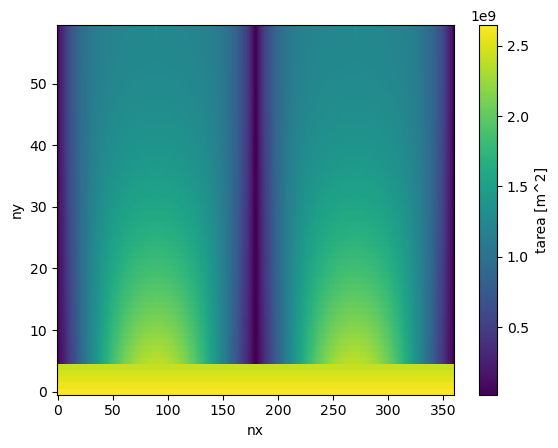

In [164]:
cice_ds.tarea.isel(ny=slice(240,300)).plot()

In [166]:
mom_ds

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 1.594e+08 1.594e+08 ... 1.435e+07 4.856e+06

In [126]:
cice_ds

<xarray.Dataset>
Dimensions:     (ny: 300, nx: 360, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/16)
    ulat        (ny, nx) float64 ...
    ulon        (ny, nx) float64 ...
    tlat        (ny, nx) float64 ...
    tlon        (ny, nx) float64 ...
    htn         (ny, nx) float64 ...
    hte         (ny, nx) float64 ...
    ...          ...
    tarea       (ny, nx) float64 ...
    uarea       (ny, nx) float64 6.476e+08 6.476e+08 ... 7.584e+07 1.945e+07
    lont_bonds  (nc, ny, nx) float64 ...
    latt_bonds  (nc, ny, nx) float64 ...
    lonu_bonds  (nc, ny, nx) float64 ...
    latu_bonds  (nc, ny, nx) float64 ...

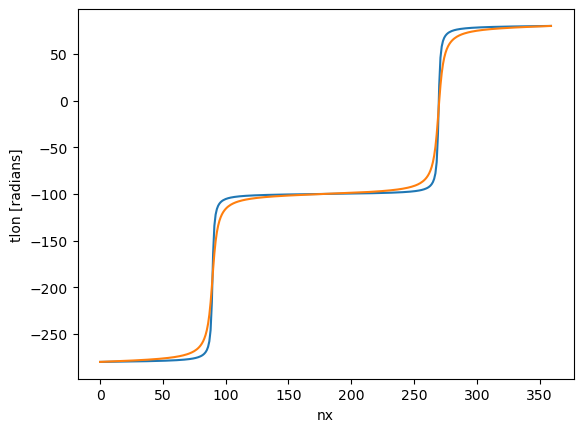

In [135]:
np.rad2deg(cice_ds.tlon.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlon.isel(ny=298)).plot()

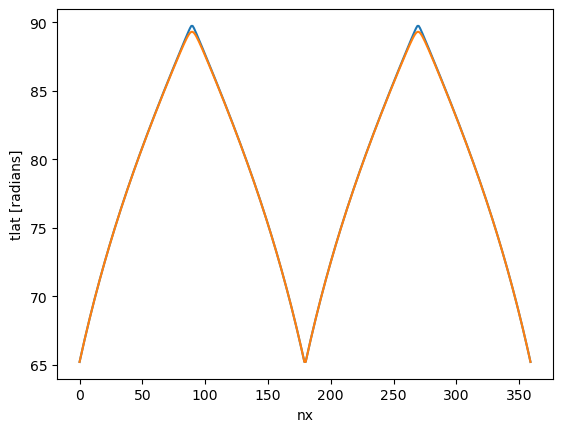

In [136]:
np.rad2deg(cice_ds.tlat.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlat.isel(ny=298)).plot()

In [146]:
cice_ds.tlat.isel(ny=299).argmax()

<xarray.DataArray 'tlat' ()>
array(89)

In [204]:
np.rad2deg(cice_ds.tlat.isel(ny=299).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)

In [207]:
np.rad2deg(cice_ds.tlat.isel(ny=299, nx=90).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)

In [145]:
cice_ds.tlat.isel(ny=299, nx=slice(150,360)).argmax()

<xarray.DataArray 'tlat' ()>
array(119)

In [205]:
np.rad2deg(cice_ds.tlat.isel(ny=299, nx=slice(150,360)).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)